# 시계열 분석이란?

- 시계열 분석은 시계열 데이터를 분석하는 것으로 시계열 예측으로도 부릅니다.
- 시계열 데이터(time series)는 관측치가 시간적 순서를 가지는 시간의 흐름에 따른 관측된 데이터입니다.

## 시계열 데이터 특징

시간의 흐름에 따라 순서대로 관측되어 시간의 영향을 받게되는 데이터

- Daily (일)
- Monthly (달)
- Quarterly (분기)
- Yearly (년)

시계열 데이터로는 다음과 같은 데이터들이 존재합니다.
- <b>시간에 따른 제품의 판매량</b>
- <b>시간에 따른 실업자 수</b>
- <b>시간에 따른 서울시 오염 정도</b>
- <b>시간에 따른 특정 제품의 재고량</b>


1. 간단한 시계열 데이터 만들기

In [121]:
import numpy as np
import pandas as pd

# 시간 벡터 생성
time_vector = np.arange(1, 21)

# np.random.randint 균일 분포의 정수 난수 생성
# np.random.rand 0부터 1사이의 균일 분포에서 난수 생성
# np.random.randn 가우시안 표준 정규 분포에서 난수 생성

1     0.756501
2     0.704338
3     0.019042
4     0.115330
5     0.921215
6     0.399551
7     0.139720
8     0.995556
9     0.101310
10    0.765706
11    0.144572
12    0.151689
13    0.677342
14    0.324070
15    0.638242
16    0.643036
17    0.233706
18    0.716687
19    0.661931
20    0.841491
dtype: float64

<Axes: >

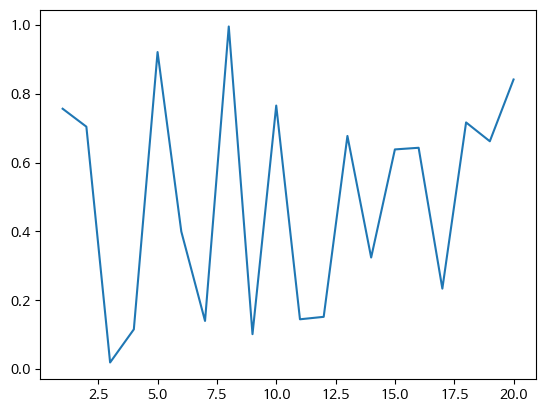

In [122]:
# 랜덤한 시계열 데이터 생성
ts_data = pd.Series(np.random.rand(20), index=time_vector)

# 결과 출력
display(ts_data)
ts_data.plot()

In [ ]:
# 랜덤한 시계열 데이터 생성
ts_data = pd.Series(np.random.randn(20), index=time_vector)

# 결과 출력
display(ts_data)
ts_data.plot()

In [ ]:
# 랜덤한 시계열 데이터 생성
ts_data = pd.Series(np.random.randint(-20, 20, size = len(time_vector)), index=time_vector)

# 결과 출력
display(ts_data)
ts_data.plot()

In [32]:
import pandas as pd

time_index = pd.date_range('2020-01-01', periods = 20, freq = 'M')
time_index

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31'],
              dtype='datetime64[ns]', freq='M')

In [33]:
import pandas as pd

time_index = pd.date_range('2020-01-01', periods = 20, freq = 'MS')
time_index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01'],
              dtype='datetime64[ns]', freq='MS')

<Axes: >

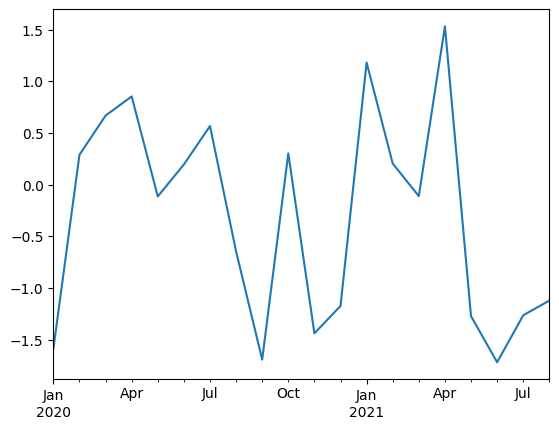

In [34]:
# 랜덤한 시계열 데이터 생성
ts_data = pd.Series(np.random.randn(20), index=time_index)

# 결과 출력
ts_data.plot()

In [35]:
ts_data

2020-01-01   -1.590528
2020-02-01    0.287614
2020-03-01    0.667261
2020-04-01    0.852676
2020-05-01   -0.114647
2020-06-01    0.194468
2020-07-01    0.566118
2020-08-01   -0.646254
2020-09-01   -1.693692
2020-10-01    0.301903
2020-11-01   -1.439423
2020-12-01   -1.174188
2021-01-01    1.180793
2021-02-01    0.203413
2021-03-01   -0.111788
2021-04-01    1.531459
2021-05-01   -1.273052
2021-06-01   -1.719226
2021-07-01   -1.264455
2021-08-01   -1.122257
Freq: MS, dtype: float64

In [36]:
# 주요 형태 파악
mean_value = ts_data.mean()
std_value = ts_data.std()

# 결과 출력
print("평균값:", mean_value)
print("표준편차:", std_value)

평균값: -0.31819029201872523
표준편차: 1.0307790903064478


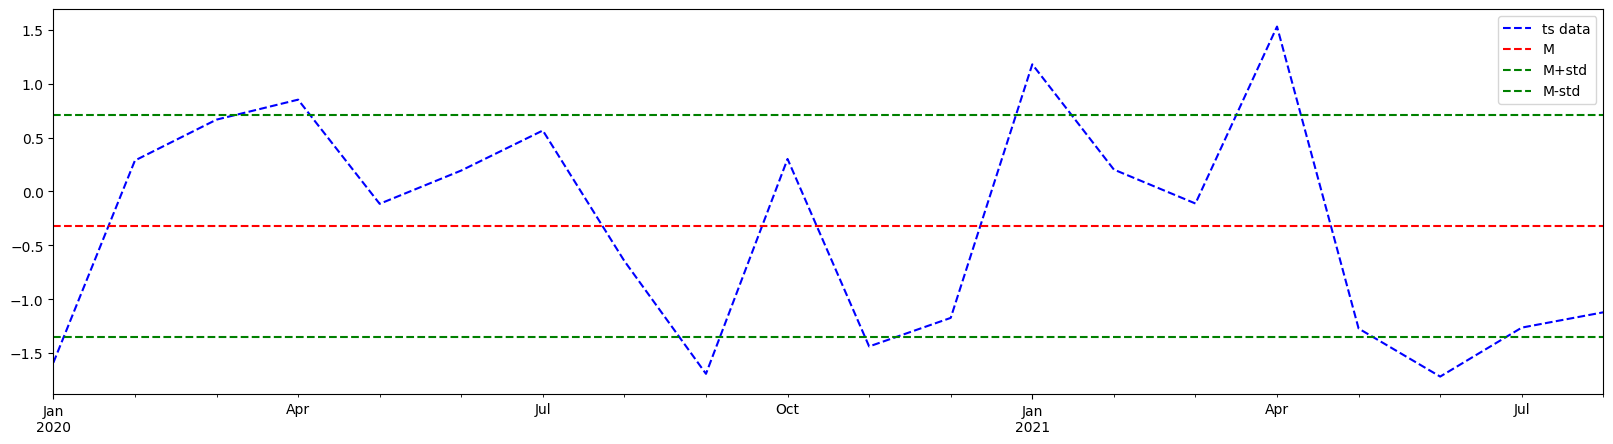

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

# ts_data에 평균 표준편차 및 평균값 표기하기
ts_data.plot(color='blue', style='--', label='ts data')
plt.axhline(mean_value, color='red', linestyle='--', label='M')
plt.axhline(mean_value+std_value, color='green', linestyle='--', label='M+std')
plt.axhline(mean_value-std_value, color='green', linestyle='--', label='M-std')
plt.legend()

### <b>간단한 시계열 데이터 만들기</b>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [39]:
# Basic time series data
dd = np.array([1342, 1442, 1252, 1343, 1425, 1362, 1256, 1272, 1243, 1359, 1412, 1253, 1201, 1478, 1322, 1406, 1254, 1289, 1497, 1208])
dd_ts = pd.Series(dd, index=pd.date_range(start='2016-01', periods=len(dd), freq='Q'))

# Seasonal variation data
dd2 = np.array([1142, 1242, 1452, 1543, 1125, 1262, 1456, 1572, 1143, 1259, 1412, 1553, 1121, 1258, 1472, 1546, 1154, 1249, 1477, 1548])
dd2_ts = pd.Series(dd2, index=pd.date_range(start='2016-01', periods=len(dd2), freq='Q'))

# Seasonal trend variation data
dd4 = np.array([1142, 1242, 1452, 1543, 1225, 1362, 1556, 1672, 1343, 1459, 1662, 1753, 1421, 1558, 1772, 1846, 1554, 1649, 1877, 1948])
dd4_ts = pd.Series(dd4, index=pd.date_range(start='2016-01', periods=len(dd4), freq='Q'))

<Axes: >

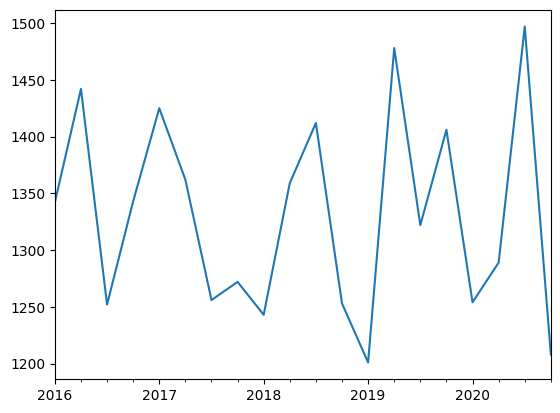

In [40]:
dd_ts.plot()

<Axes: >

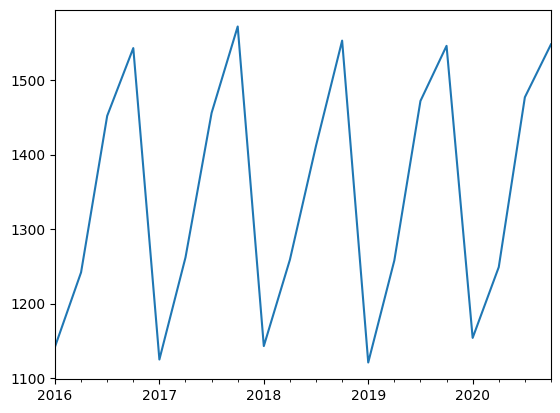

In [41]:
dd2_ts.plot()

<Axes: >

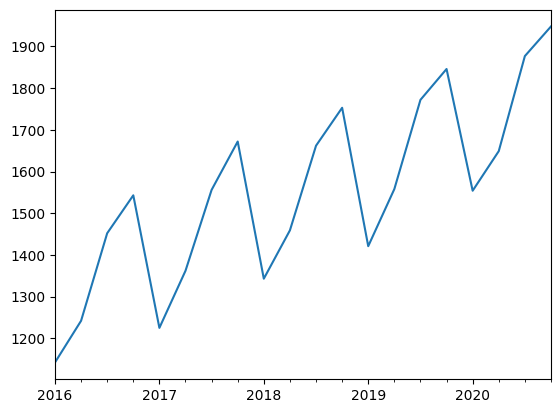

In [42]:
dd4_ts.plot()

df_decomposed의 model 매개변수를 'additive'에서 'multiplicative'로 변경해야 합니다. 시계열 데이터의 계절성이 선형적인 경우 'additive' 모델을 사용하고, 비선형적인 경우 'multiplicative' 모델을 사용하는 것이 일반적입니다. 이 모델 선택은 데이터에 따라 다를 수 있습니다.

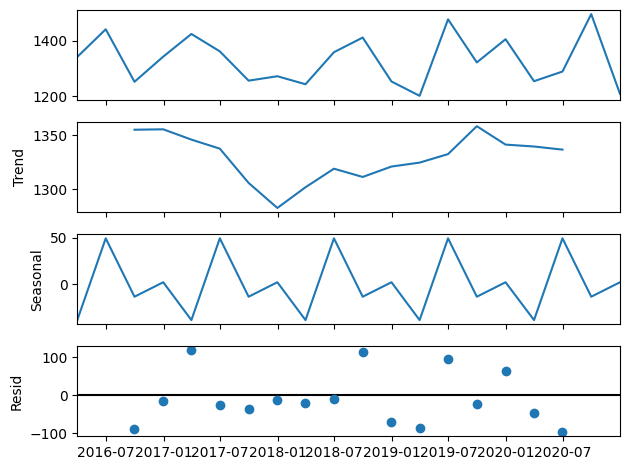

In [43]:
dd_decomposed = seasonal_decompose(dd_ts, model='additive')
dd_decomposed.plot()
plt.show()

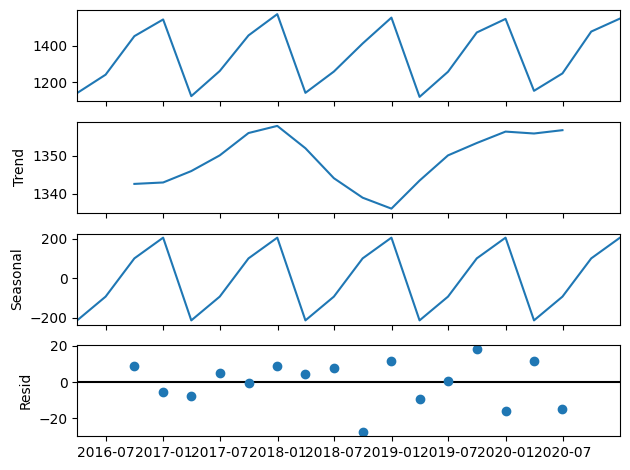

In [44]:
dd2_decomposed = seasonal_decompose(dd2_ts, model='additive')
dd2_decomposed.plot()
plt.show()

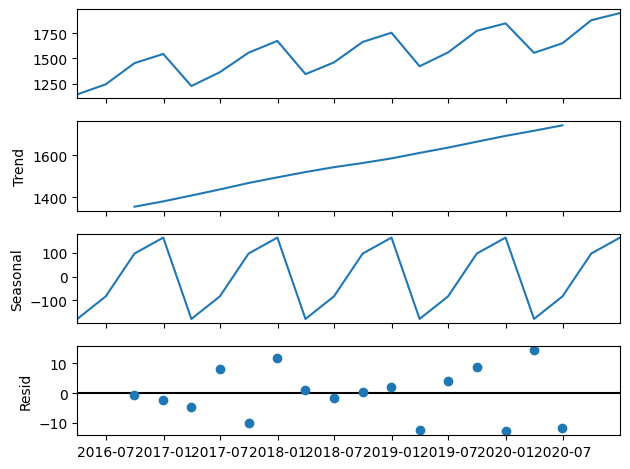

In [45]:
dd4_decomposed = seasonal_decompose(dd4_ts, model='additive')
dd4_decomposed.plot()
plt.show()

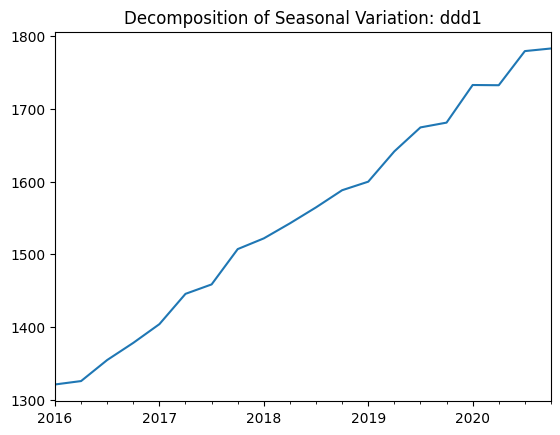

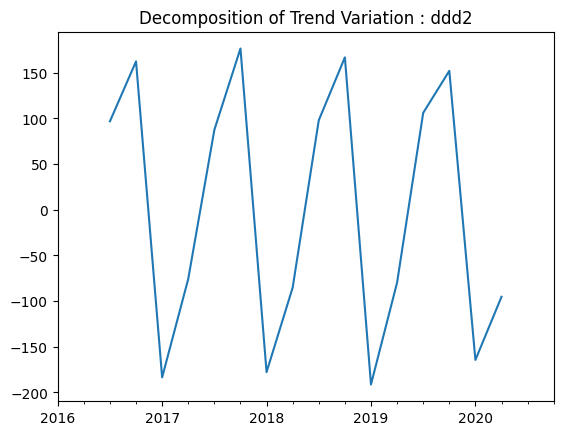

In [46]:
# Remove seasonal and trend components
ddd1 = dd4_ts - dd4_decomposed.seasonal
ddd2 = dd4_ts - dd4_decomposed.trend

# Plot the time series data after removing seasonal and trend components
ddd1.plot(title="Decomposition of Seasonal Variation: ddd1")
plt.show()

ddd2.plot(title="Decomposition of Trend Variation : ddd2")
plt.show()

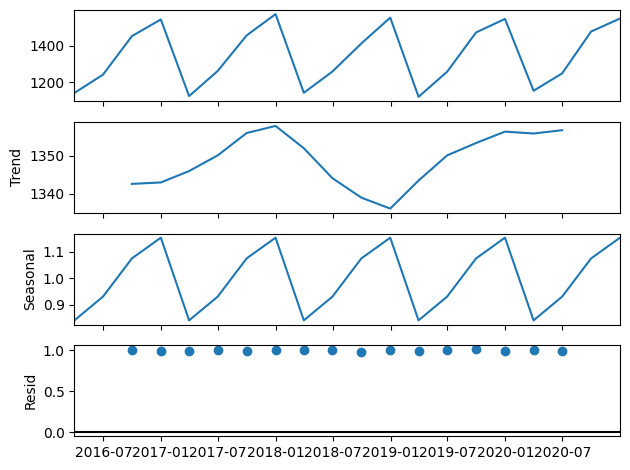

In [47]:
dd2_decomposed_m = seasonal_decompose(dd2_ts, model='multiplicative')
dd2_decomposed_m.plot()
plt.show()

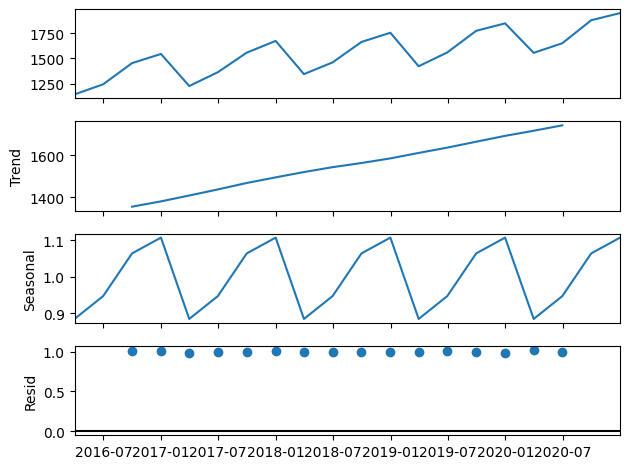

In [48]:
dd4_decomposed_m = seasonal_decompose(dd4_ts, model='multiplicative')
dd4_decomposed_m.plot()
plt.show()

### <b>시계열 데이터의 시각화</b>

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [51]:
df = df.set_index('Month')
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [52]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

<Axes: xlabel='Month'>

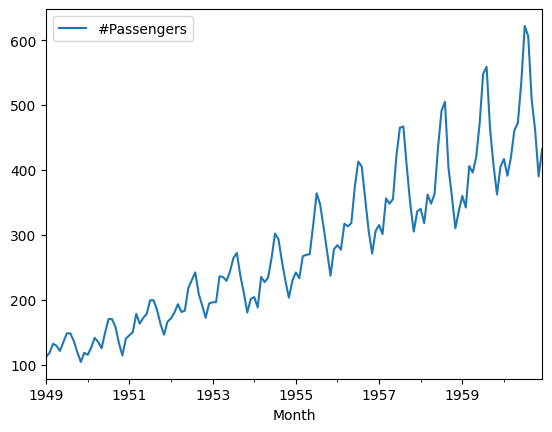

In [53]:
df.plot()

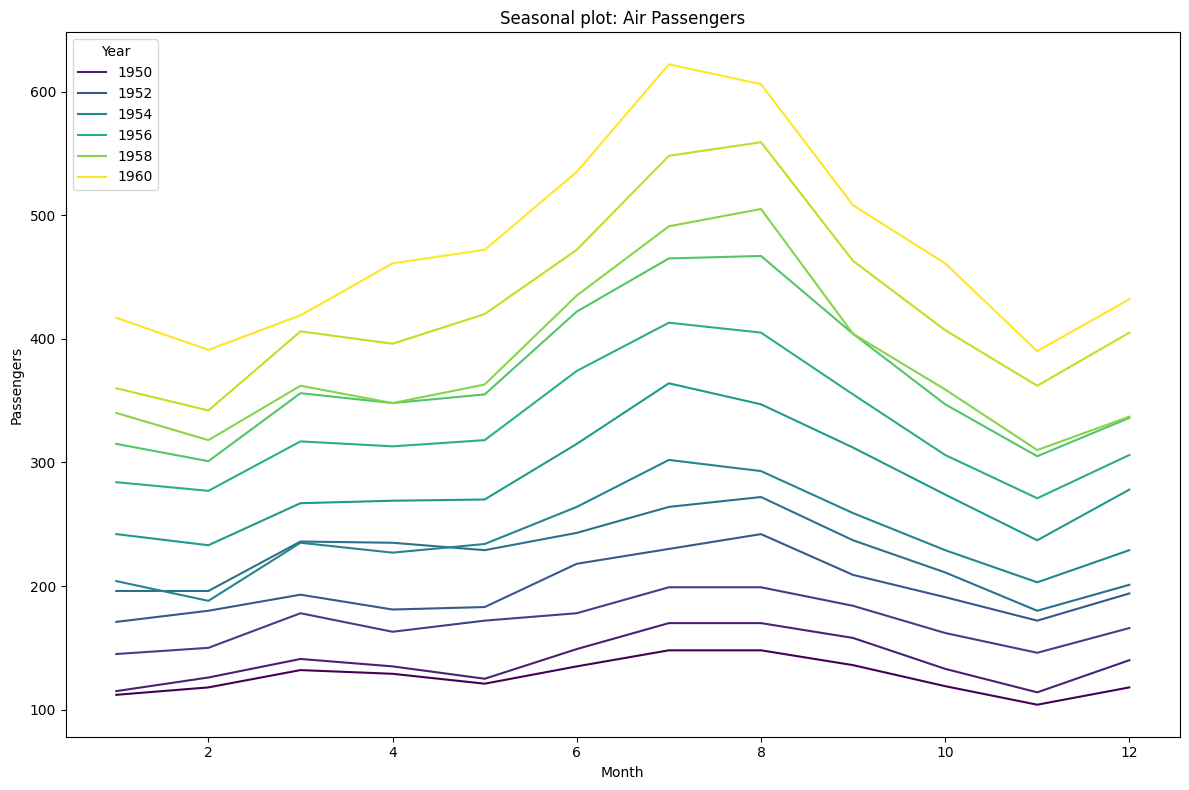

In [57]:
import seaborn as sns

# Plot the seasonal plot using seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(x=df.index.month, y="#Passengers", hue=df.index.year, palette="viridis", data=df)
plt.title('Seasonal plot: Air Passengers')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend(title='Year', loc='upper left')
plt.tight_layout()
plt.show()

### <b>차분(Difference): `diff`</b>
> 차분은 시계열 데이터에서 연속된 관측치 사이의 변화를 측정하는 방법입니다. 이는 현재 값에서 이전 값(또는 지정된 시간 단위 이전의 값)을 뺀 결과로 계산됩니다. 차분을 사용하면 시계열 데이터의 정상성을 달성하거나 시즌성을 제거할 수 있습니다.


In [58]:
display(len(df))
df

144

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [59]:
display(len(df.diff())) # periods=1
df.diff()

144

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [60]:
display(len(df.diff(periods=2))) # periods=1
df.diff(periods=2)

144

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,20.0
1949-04-01,11.0
1949-05-01,-11.0
...,...
1960-08-01,71.0
1960-09-01,-114.0
1960-10-01,-145.0


In [61]:
display(len(df.diff().diff()))
df.diff().diff()

144

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
...,...
1960-08-01,-103.0
1960-09-01,-82.0
1960-10-01,51.0


### 역차분(Inverse Difference): `diffinv`
> 역차분은 차분의 반대 작업입니다. 차분된 데이터를 원래의 시계열 데이터로 되돌리는 데 사용됩니다.


In [62]:
np.mean(df.values)

280.2986111111111

In [63]:
# 역차분
display(df.head())
difff_data = df.diff()
display(difff_data.head())
diffinv_data = difff_data.cumsum()
display(diffinv_data.head())
temp = diffinv_data.fillna(0) + df.values[0]
display(temp.head())

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


,#Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


,#Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,20.0
1949-04-01,17.0
1949-05-01,9.0


,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


### 시계열 합집합

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [65]:
from sklearn.model_selection import train_test_split

ts_data1, ts_data2 = train_test_split(df, test_size=.4, shuffle=False)
ts_data1.info(), ts_data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86 entries, 1949-01-01 to 1956-02-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  86 non-null     int64
dtypes: int64(1)
memory usage: 1.3 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58 entries, 1956-03-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  58 non-null     int64
dtypes: int64(1)
memory usage: 928.0 bytes


(None, None)

In [66]:
# 시계열 합집합
ts_union_data = pd.concat([ts_data1, ts_data2], axis=0)
ts_union_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


### 시계열 교집합: `intersect`

In [67]:
# 시계열 교집합
ts_intersect_data = ts_data1.merge(ts_data2, left_index=True, right_index=True)
display(ts_intersect_data.head())
print()
ts_intersect_data.info()

,#Passengers_x,#Passengers_y
Month,,



<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   #Passengers_x  0 non-null      int64
 1   #Passengers_y  0 non-null      int64
dtypes: int64(2)
memory usage: 0.0+ bytes


In [68]:
# 시계열 교집합
ts_intersect_data = ts_data1.merge(ts_data2)
display(ts_intersect_data.head())
print()
ts_intersect_data.info()

,#Passengers
0,315
1,347



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  2 non-null      int64
dtypes: int64(1)
memory usage: 32.0 bytes


### 시계열 부분추출 및 수정: `window`


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [70]:
# 시계열 부분추출 및 수정
window_data = df['1950-12-1':'1951-02-01']
window_data

,#Passengers
Month,
1950-12-01,140
1951-01-01,145
1951-02-01,150


### 시계열 통합: `aggregate`

<Axes: xlabel='Month'>

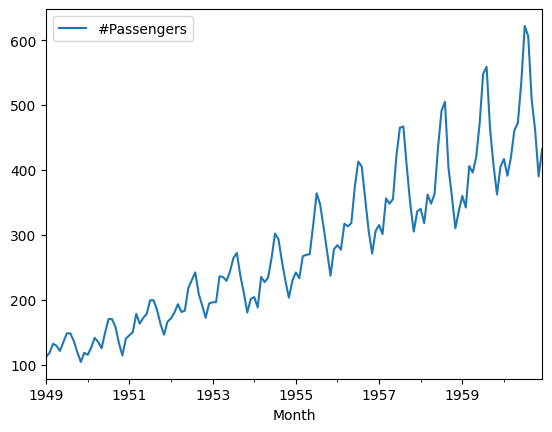

In [71]:
# 시계열 통합
agg_data = df.resample('M').mean()
agg_data.plot()

<Axes: xlabel='Month'>

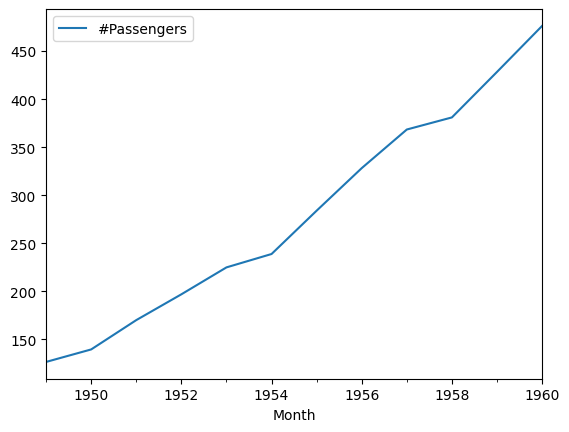

In [72]:
# 시계열 통합
agg_data = df.resample('Y').mean()
agg_data.plot()

### 평활화(Smoothing)

평활화(smoothing) 문제는 현재까지 수집한 관측치  y1,⋯,yt 를 이용해서
현재까지의 상태 변수 히스토리  x1,⋯,xt 을 전체를 모두 재추정하는 문제를 말한다.
금융 분야에서 팩터 모형(factor model)의 계수를 추정하는 문제도 스무딩 문제에 속한다.
또한 시계열 자료 중 누락된 자료(missing data)가 있는 경우에도 스무딩 문제 해결을 통해 누락된 자료를 추정할 수 있다.

- 시계열 자료에서 무작위성을 줄이는 기법
- 평활화 개념에 Filter 를 포함하기도 함

이동 평균은 데이터를 부드럽게 만들거나 추세를 파악하는 데 사용되는 기본적인 시계열 데이터 처리 방법 중 하나입니다. 다양한 종류의 이동 평균이 있으며, 주요 유형은 다음과 같습니다:

### 1. 단순 이동 평균 (Simple Moving Average, SMA):
단순 이동 평균은 주어진 창 크기 내의 데이터 포인트의 평균을 계산합니다. 모든 데이터 포인트에 동일한 가중치를 부여합니다. 이를 파이썬으로 구현하려면 다음과 같이 할 수 있습니다:

```python
def simple_moving_average(data, window_size):
    sma = data.rolling(window=window_size).mean()
    return sma
```

### 2. 지수 가중 이동 평균 (Exponential Moving Average, EMA):
지수 가중 이동 평균은 최신 데이터 포인트에 더 높은 가중치를 부여하고 이전 데이터 포인트에 낮은 가중치를 부여합니다. 이를 파이썬으로 구현하려면 다음과 같이 할 수 있습니다:

```python
def exponential_moving_average(data, alpha):
    ema = data.ewm(alpha=alpha, adjust=False).mean()
    return ema
```

### 3. 삼각 이동 평균 (Triangular Moving Average):
삼각 이동 평균은 일정한 크기의 가중 이동 평균을 사용하지만, 가중치를 삼각형 모양으로 배치합니다. 가장 최근 데이터 포인트에 더 높은 가중치를 부여합니다. 이를 파이썬으로 구현하려면 다음과 같이 할 수 있습니다:

```python
def triangular_moving_average(data, window_size):
    weights = np.array(range(1, window_size+1))
    tma = data.rolling(window=window_size).apply(lambda x: np.sum(x * weights) / np.sum(weights))
    return tma
```

### 4. 가중 이동 평균 (Weighted Moving Average):
가중 이동 평균은 각 데이터 포인트에 다른 가중치를 부여하여 특정 데이터 포인트를 중요하게 고려하는 데 사용됩니다. 가중치는 사용자가 정의하며, 시계열 데이터의 특성에 따라 조절할 수 있습니다. 이를 파이썬으로 구현하려면 사용자가 정의한 가중치를 사용하여 평균을 계산하면 됩니다.

```python
def weighted_moving_average(data, weights):
    wma = data.ewm(span=len(weights)).mean()
    return wma
```

각각의 이동 평균 유형은 다른 데이터 특성에 대해 다른 결과를 제공합니다. 데이터의 성격과 분석 목적에 따라 적절한 이동 평균 유형을 선택해야 합니다.

In [73]:
# 이동평균 평활법 분석사례: filter EDA

<Axes: xlabel='Month'>

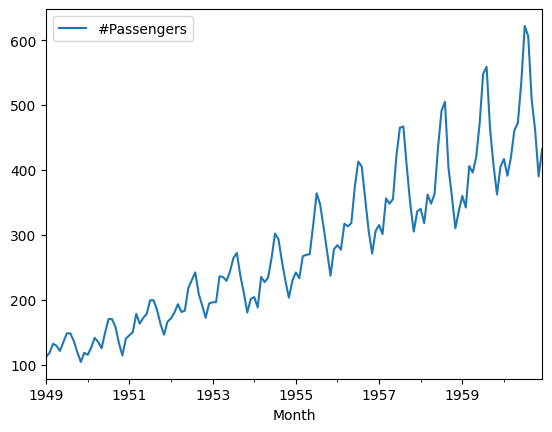

In [74]:
# AirPassenger
df.plot()

`rolling` 함수는 pandas 라이브러리에서 제공되며 시계열 데이터에 이동 평균 및 이동 통계를 계산하는 데 사용됩니다. 이 함수는 여러 가지 파라미터를 받아 다양한 방식으로 이동 평균을 계산할 수 있습니다. 주요 파라미터와 그 역할은 다음과 같습니다:

1. **window**: 이동 평균을 계산하는 창의 크기를 지정합니다. 이 값은 정수로 표현되며, 시계열 데이터에서 몇 개의 데이터 포인트를 고려할 것인지를 결정합니다. 예를 들어, `window=3`은 3개의 데이터 포인트를 고려한 이동 평균을 계산합니다.

2. **min_periods**: 최소한으로 필요한 유효한 데이터 포인트 수를 지정합니다. 이 값을 설정하면 유효한 데이터 포인트 수가 지정한 값보다 작을 때 NaN 값이 아닌 결과를 반환합니다.

3. **win_type**: 창 함수의 유형을 지정합니다. 일반적으로 이동 평균 계산에는 `"triang"` 또는 `"boxcar"`와 같은 값을 사용할 수 있습니다. 각 유형은 계산에 사용되는 가중치를 나타냅니다.

4. **center**: True로 설정하면 중심 이동 평균을 계산하며, False로 설정하면 단순 이동 평균을 계산합니다. 중심 이동 평균은 창 크기가 짝수인 경우 사용됩니다.

5. **min_periods**: 이동 평균을 계산할 때 고려해야 하는 최소한의 데이터 포인트 수를 지정합니다. 이 값보다 적은 데이터가 있는 경우 결과가 NaN이 됩니다.

6. **axis**: 이동 평균을 계산할 축을 지정합니다. 주로 시계열 데이터의 경우 축은 0 (기본값)이며, 열별로 이동 평균을 계산합니다.

이러한 파라미터를 조합하여 다양한 이동 평균을 계산할 수 있으며, 데이터의 특성과 분석 목적에 맞게 설정할 수 있습니다.

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,120.00
1949-04-01,127.75
1949-05-01,127.75
...,...
1960-08-01,596.25
1960-09-01,585.50
1960-10-01,520.75


<Axes: xlabel='Month'>

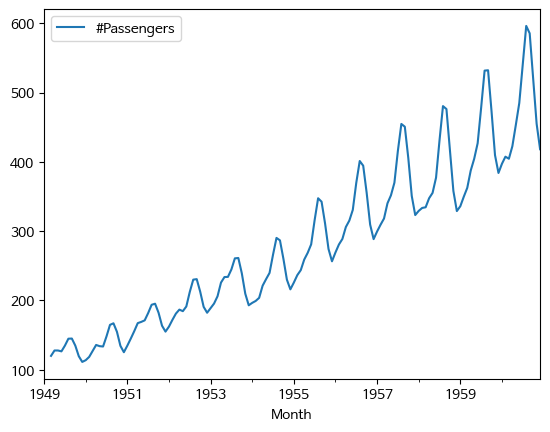

In [79]:
smoothed_3 = df.rolling(window=3, win_type='triang').mean()
display(smoothed_3)
smoothed_3.plot()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,438.777778
1960-09-01,459.236111
1960-10-01,480.791667


<Axes: xlabel='Month'>

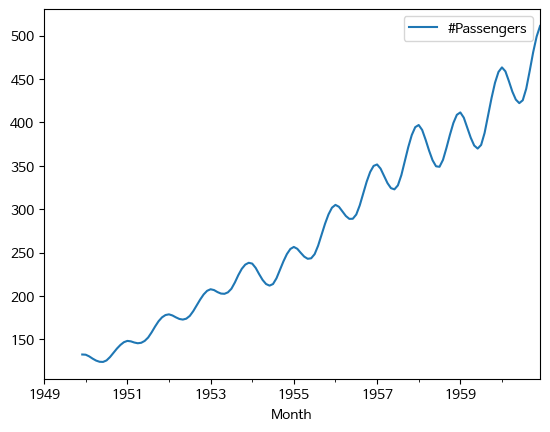

In [80]:
smoothed_12 = df.rolling(window=12, win_type='triang').mean()
display(smoothed_12)
smoothed_12.plot()

In [77]:
import matplotlib.pyplot as plt

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

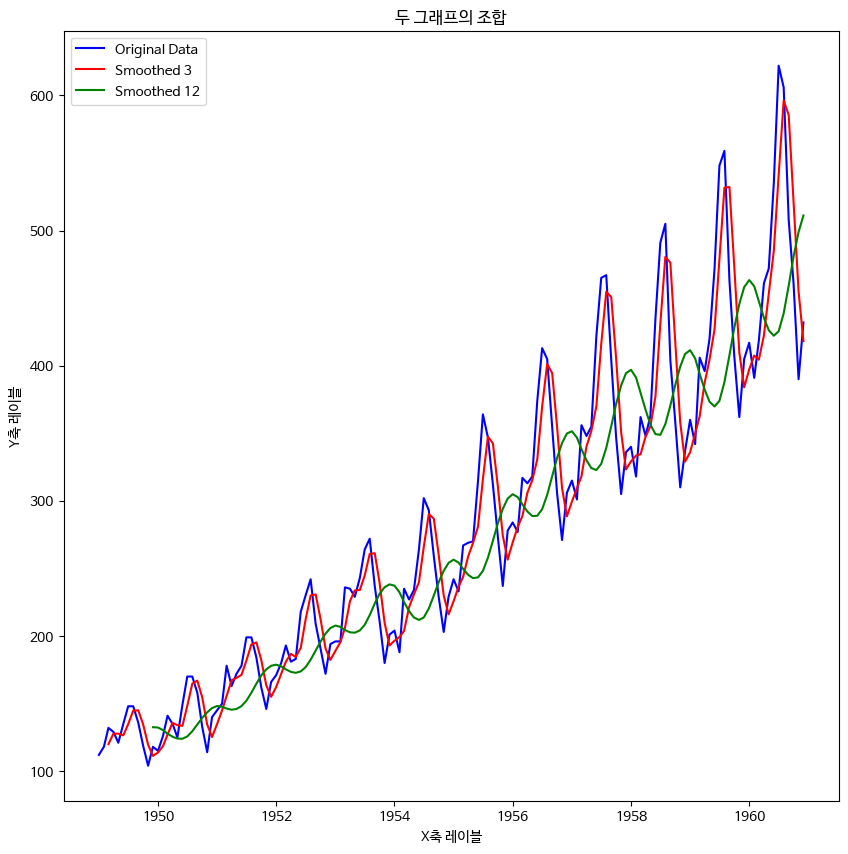

In [81]:
plt.figure(figsize=(10, 10))

# 첫 번째 그래프 그리기 (원본 데이터)
plt.plot(df.index, df.values, label='Original Data', color='b')

# 두 번째 그래프 그리기 (평활화된 데이터: 3)
plt.plot(smoothed_3.index, smoothed_3.values, label='Smoothed 3', color='r')

# 두 번째 그래프 그리기 (평활화된 데이터: 12)
plt.plot(smoothed_12.index, smoothed_12.values, label='Smoothed 12', color='g')

# 그래프에 레이블, 범례 추가
plt.xlabel('X축 레이블')
plt.ylabel('Y축 레이블')
plt.title('두 그래프의 조합')
plt.legend()

# 그래프 표시
plt.show()

### 요소분해(Decomposition)

- 시계열 자료는 우연변동, 추세변동, 계절변동, 주기변동 등 다양한 변동의 성분이 중첩되어 있다. 시계열 자료에서 추세 및 주기의 유무와 크기를 파악하는 일은 시계열 분석에서 중요한 EDA의 하나이며, 대표적인 방법이 **요소분해법**(Decomposition)이다.

- 시계열 자료를 우연변동, 추세변동, 주기변동으로 구분하여 이를 각 요소로 분해하게 되는데, 분해방법에 따라
  - 선형적으로 구성되는 가법모형(Additive)과
  - 비선형적으로 구성되는 승법모형(Muliplicative)으로 구분된다.

- 중첩된 변동요인을 분해하는 목적은 시계열 자료에서 추세변동과 주기변동을 제거할 경우 남은 잔차(Residual) 시계열 자료를 우연변동에 의한 정상 시계열(Stationary Time Series)로 만들 수 있기 때문이다.
  - 시계열 자료의 대부분은 추세변동과 주기변동을 제외할 경우 잔차 시계열은 정상 시계열이 된다.
  - 잔차가 정상 시계열이 되지 않는 경우 보다 정밀한 추가 분석이 필요할 수도 있다.

- 시계열 성분 추출은 `decompose`를 이용하며 가법모형과 승법모형으로 구분한다.
- 시계열 자료 y_t를 추세 및 주기변동(TC), 계절변동(S), 우연변동 (I) 등으로 구분하여 성분을 추출한다.
- 승법모형은 Log 변환으로 가법모형이 된다.

  - 가법모형: y_t = TC_t + S_t + I_t
  - 승법모형: y_t = TC_t * S_t * I_t

In [ ]:
# 1) 시계열 자료의 분해: Decompose 분석사례 (1) (가법모형)

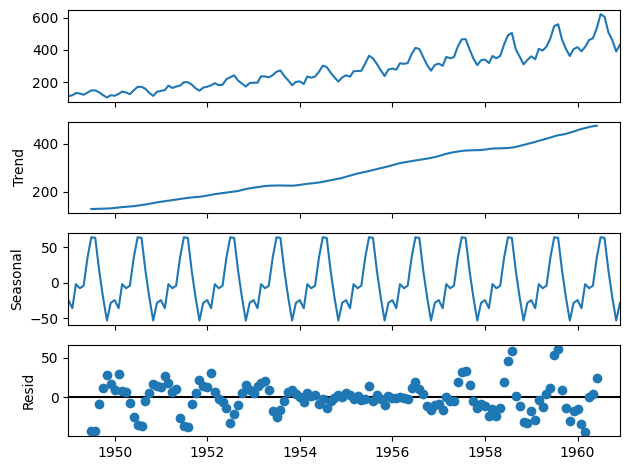

In [54]:
df_decomposed = seasonal_decompose(df, model='additive')
df_decomposed.plot()
plt.show()

<Figure size 2000x500 with 0 Axes>

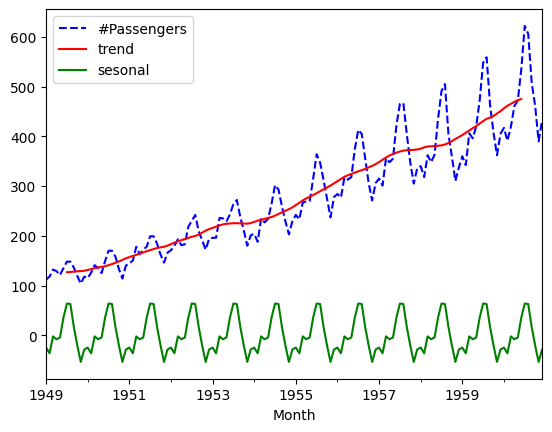

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

# ts_data에 평균 표준편차 및 평균값 표기하기
df.plot(color='blue', style='--', label='ts data')
df_decomposed.trend.plot(color='red', label='trend')
df_decomposed.seasonal.plot(color='green', label='sesonal')
plt.legend()

hue: Seaborn 라이브러리의 lineplot과 같은 함수에서 사용하는 hue 매개변수는 데이터의 서로 다른 범주에 따라 색상을 지정하는 데 사용됩니다. 이를 통해 같은 플롯 안에 여러 그룹의 데이터를 서로 다른 색상으로 표시할 수 있어, 비교가 용이해집니다. 위의 코드에서 hue=df.index.year는 각기 다른 연도를 대표하는 선에 서로 다른 색상을 적용하여 각 연도의 데이터를 구분하도록 지정했습니다.

In [ ]:
# 2) 시계열 자료의 분해: Decompose 분석사례 (2) (승법모형)

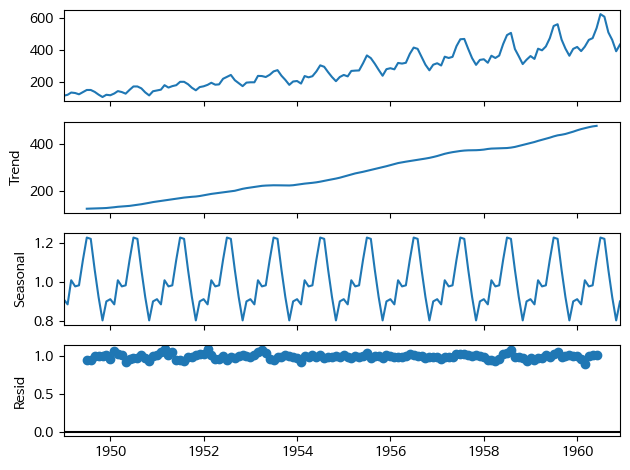

In [102]:
df_decomposed = seasonal_decompose(df, model='multiplicative')
df_decomposed.plot()
plt.show()

In [103]:
# 3) 시계열 자료의 분해: Decompose 분석사례 (3)

# (1) 분석자료: 국제 항공여객 자료 1960-1972

In [104]:
df_decomposed.resid[df_decomposed.resid.isnull() == True]

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
1949-06-01   NaN
1960-07-01   NaN
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, dtype: float64

In [105]:
df_decomposed.resid[df_decomposed.resid.isnull() != True]

Month
1949-07-01    0.951664
1949-08-01    0.953401
1949-09-01    1.002220
1949-10-01    1.004028
1949-11-01    1.006270
                ...   
1960-02-01    0.959079
1960-03-01    0.894086
1960-04-01    1.006495
1960-05-01    1.017359
1960-06-01    1.012079
Name: resid, Length: 132, dtype: float64

In [116]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 시계열 분해 (Additive 모델)
result_add = sm.tsa.seasonal_decompose(df, model='additive')
resid_add = pd.Series(result_add.resid)

# 시계열 분해 (Multiplicative 모델)
result_mul = sm.tsa.seasonal_decompose(df, model='multiplicative')
resid_mul = pd.Series(result_mul.resid)

# 결측치 보간
## 데이터프레임 df에서 누락된 값을 평균값으로 채우기
# mean_add = resid_add.mean()
# mean_mul = resid_mul.mean()
# resid_add = resid_add.fillna(mean_add)
# resid_mul = resid_mul.fillna(mean_mul)

## 데이터프레임 df에서 누락된 값을 0값으로 채우기
# resid_add = resid_add.fillna(0)
# resid_mul = resid_mul.fillna(0)

## 데이터프레임 df에서 누락된 값을 삭제하기
resid_add = resid_add.dropna()
resid_mul = resid_mul.dropna()

# KPSS 단위근 검정 (Additive 모델의 잔차)
kpss_add = sm.tsa.kpss(resid_add, regression='c')
print("KPSS Test (Additive Model):")
print("Test Statistic:", kpss_add[0])
print("p-value:", kpss_add[1])
print("Critical Values:", kpss_add[3])

# KPSS 단위근 검정 (Multiplicative 모델의 잔차)
kpss_mul = sm.tsa.kpss(resid_mul, regression='c')
print("\nKPSS Test (Multiplicative Model):")
print("Test Statistic:", kpss_mul[0])
print("p-value:", kpss_mul[1])
print("Critical Values:", kpss_mul[3])

KPSS Test (Additive Model):
Test Statistic: 0.019966537534110942
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

KPSS Test (Multiplicative Model):
Test Statistic: 0.03606301503478411
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-116-c8579c368e8f>:30: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_add = sm.tsa.kpss(resid_add, regression='c')
<ipython-input-116-c8579c368e8f>:37: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_mul = sm.tsa.kpss(resid_mul, regression='c')


KPSS (Kwiatkowski-Phillips-Schmidt-Shin) 검정은 시계열 데이터의 정상성(stationarity)을 검사하는 데 사용됩니다.

- 귀무 가설(null hypothesis)은 시계열이 정상적(stationary)이거나 트렌드 정상성(trend-stationary)을 가진다는 것입니다.

- 대립 가설(alternative hypothesis)은 시계열에 단위근(unit root)이 존재하며, 따라서 비정상적(non-stationary)이라는 것입니다.

귀하가 제공한 KPSS 검정 결과를 해석해보겠습니다:

1. **KPSS 검정 (가법 모델)**:
   - **테스트 통계량 (Test Statistic)**: 0.01997
   - **p-값 (p-value)**: 0.1
   - **임계값 (Critical Values)**: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

2. **KPSS 검정 (곱법 모델)**:
   - **테스트 통계량 (Test Statistic)**: 0.03606
   - **p-값 (p-value)**: 0.1
   - **임계값 (Critical Values)**: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

KPSS (Kwiatkowski-Phillips-Schmidt-Shin) 검정은 시계열 데이터의 정상성(stationarity)을 평가하는 데 사용되는 검정 방법입니다, 정규성(normality)과는 다릅니다. 이 두 가지 개념은 서로 다른 특성을 평가합니다.

1. **정상성(Stationarity):** 시계열 데이터가 시간에 따라 그 통계적 속성(예: 평균, 분산)이 일정하게 유지되는지를 나타냅니다. KPSS 검정의 귀무 가설은 시계열이 정상적이라는 것입니다.

2. **정규성(Normality):** 데이터가 정규 분포를 따르는지를 나타냅니다. 이는 Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov와 같은 다른 검정 방법들로 평가됩니다.

해당, KPSS 검정 결과에 따르면, 두 모델(가법 모델과 곱법 모델) 모두에서 p-값이 0.1입니다. 이는 10%의 유의 수준에서 귀무 가설(시계열이 정상적이라는 가설)을 기각할 수 없음을 의미합니다. 즉, 이 데이터는 10%의 유의 수준에서 정상성을 가진다고 볼 수 있습니다.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


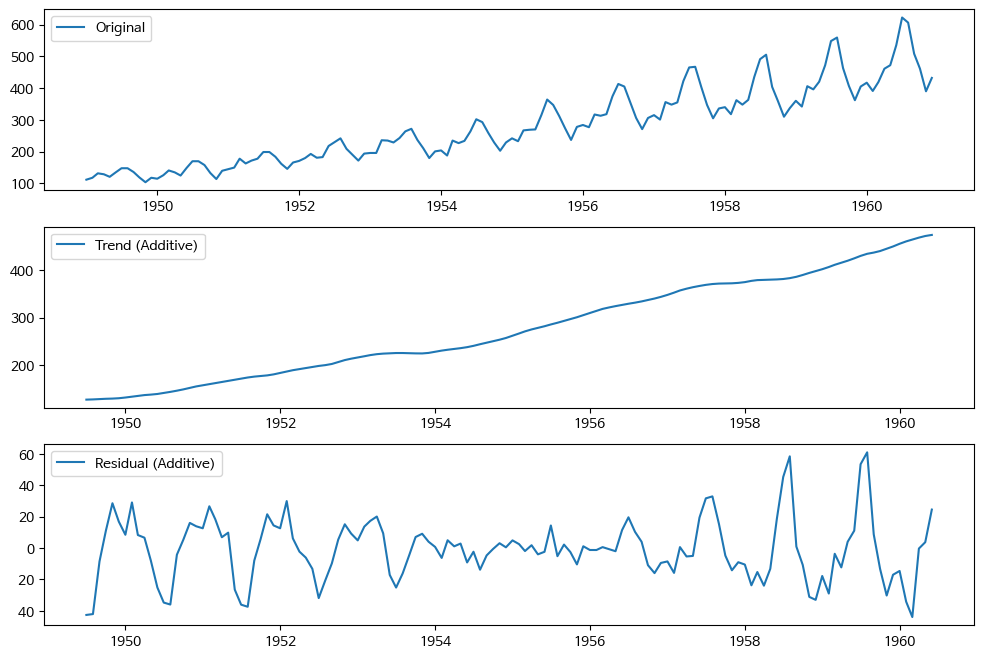

In [117]:
# 결과 시각화
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df, label='Original')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(result_add.trend, label='Trend (Additive)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(result_add.resid, label='Residual (Additive)')
plt.legend()

plt.show()

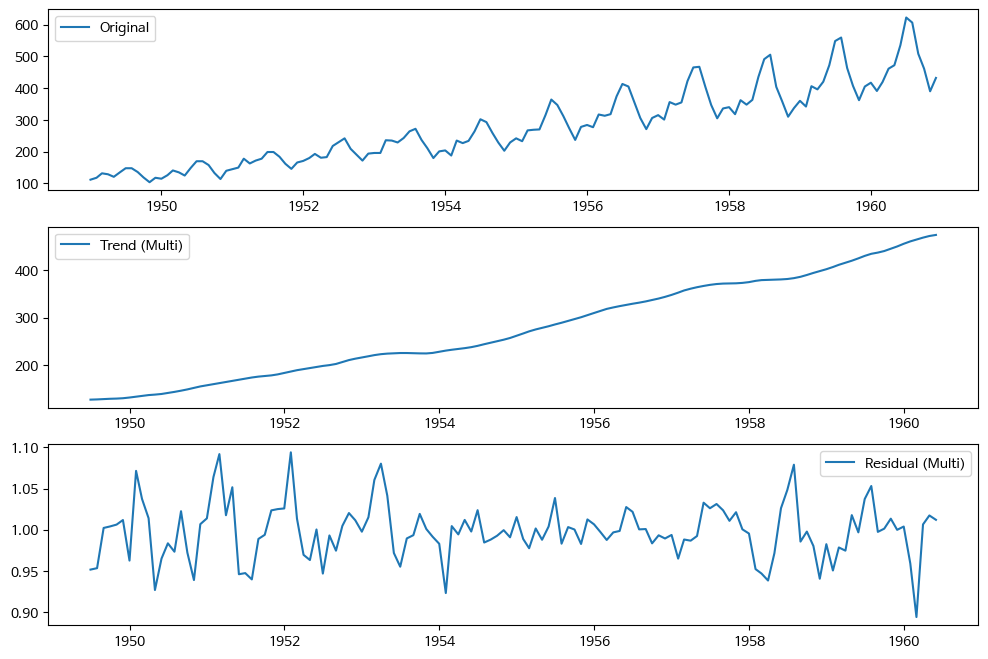

In [118]:
# 결과 시각화
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df, label='Original')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(result_mul.trend, label='Trend (Multi)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(result_mul.resid, label='Residual (Multi)')
plt.legend()

plt.show()

## 데이터(Google Trend)
구글 트랜드는 어떤 주제나 검색어가 시간에 따라 얼마나 인기가 있는지, 지역별로 어떤 트렌드를 보이는지를 확인할 수 있는 구글의 무료 도구입니다. 이 도구를 통해 사용자들은 다양한 검색어의 인기도를 비교하거나 특정 시기나 지역에서의 검색 트렌드를 파악할 수 있습니다.

### 주요 기능

1. 시간에 따른 검색어 인기도 확인:
> 특정 검색어가 최근에 인기가 있는지, 과거에는 어떠한지를 그래프로 확인할 수 있습니다.

2. 지역별 검색어 인기도 비교:
> 특정 검색어가 어느 지역에서 가장 인기가 있는지, 지역별로 어떤 검색어가 뜨고 있는지를 확인할 수 있습니다.

3. 관련 검색어 파악:
> 주요 검색어와 관련된 다른 검색어들의 인기도를 함께 파악할 수 있습니다. 이를 통해 관련 주제나 키워드를 발견할 수 있습니다.

4. 카테고리 및 시장 세분화:
> 구글 트랜드는 다양한 카테고리와 시장에 따른 검색 트렌드를 제공합니다. 이를 통해 특정 산업이나 분야에서의 인기 키워드를 파악할 수 있습니다.

계절성이 있는 데이터를 가져오기 위해 계절성이 확실한 <b>수영복</b>을 키워드로 데이터를 구글 트랜드에서 가져왔습니다. [링크](https://trends.google.com/trends/explore?date=all&geo=KR&q=%EC%88%98%EC%98%81%EB%B3%B5&hl=ko)

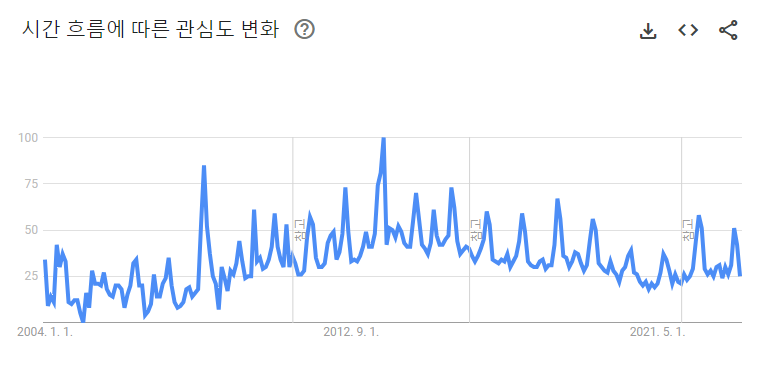

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd

# 본인이 저장한 경로로부터 데이터 읽기
df = pd.read_csv('/content/drive/MyDrive/Data/수영복_GoogleTrend.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
print(df.columns)
df.info()

Index(['swimsuit'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 237 entries, 2004-01-01 to 2023-09-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   swimsuit  237 non-null    int64
dtypes: int64(1)
memory usage: 3.7 KB


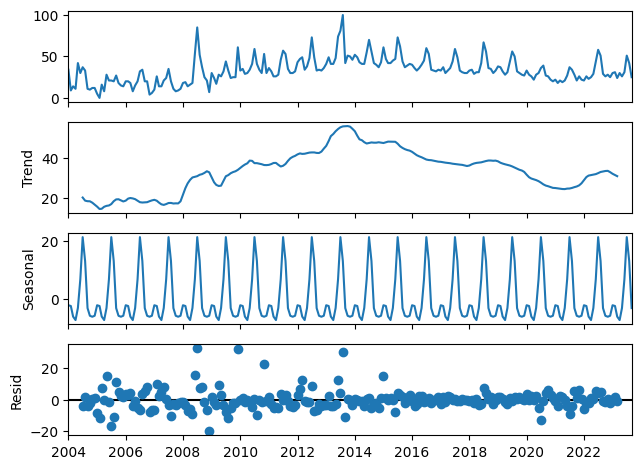

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_decomposed = seasonal_decompose(df, model='additive')
df_decomposed.plot()
plt.show()

In [11]:
df_decomposed = seasonal_decompose(df, model='multiplicative')
df_decomposed.plot()
plt.show()

ValueError: ignored

In [12]:
df[df.values <= 0]

,swimsuit
date,
2005-02-01,0


In [13]:
# https://www.statsmodels.org/stable/examples/notebooks/generated/stationarity_detrending_adf_kpss.html
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 시계열 분해 (Additive 모델)
result_add = sm.tsa.seasonal_decompose(df, model='additive')
resid_add = pd.Series(result_add.resid)

## 데이터프레임 df에서 누락된 값을 삭제하기
resid_add = resid_add.dropna()

# KPSS 단위근 검정 (Additive 모델의 잔차)
kpss_test(resid_add)

Results of KPSS Test:
Test Statistic           0.037882
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


<ipython-input-13-f83493142140>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")


*(참고)*
### ACF, PACF

다음은 시계열 데이터의 자기상관 함수(Autocorrelation Function, ACF)와 부분 자기상관 함수(Partial Autocorrelation Function, PACF)를 시각화하는 것입니다. 이러한 플롯들은 시계열 데이터의 패턴과 구조를 이해하는 데 도움을 주며, ARIMA와 같은 시계열 모델링에 필요한 매개변수를 결정하는 데 유용합니다.

1. **자기상관 함수 (ACF)**:
   - ACF는 시계열 데이터의 현재 값과 이전의 값들 사이의 상관관계를 나타냅니다.
   - x축은 'lag'를 나타내며, y축은 상관계수를 나타냅니다.
   - Lag 0에서의 ACF 값은 항상 1입니다.
   - ACF 플롯에서 점선은 통계적으로 유의미한 상관관계의 경계를 나타냅니다. 이 경계를 벗어나는 값들은 통계적으로 유의미한 상관관계를 가집니다.
   - ACF 플롯은 MA 모델의 차수를 결정하는 데 도움을 줄 수 있습니다.

2. **부분 자기상관 함수 (PACF)**:
   - PACF는 시계열 데이터의 현재 값과 이전의 값들 사이의 상관관계를 나타내되, 중간의 값들의 영향을 제거한 상관관계를 나타냅니다.
   - PACF 플롯에서도 x축은 'lag'를 나타내며, y축은 상관계수를 나타냅니다.
   - PACF 플롯에서 점선은 마찬가지로 통계적으로 유의미한 상관관계의 경계를 나타냅니다.
   - PACF 플롯은 AR 모델의 차수를 결정하는 데 도움을 줄 수 있습니다.

해석 방법:
- ACF가 천천히 감소하고 PACF가 특정 lag에서 절단된다면, AR 모델의 차수를 고려해볼 수 있습니다.
- ACF가 특정 lag에서 절단되고 PACF가 천천히 감소한다면, MA 모델의 차수를 고려해볼 수 있습니다.